In [1]:
#Data Loading
import pandas as pd
datapath = "insurance_claims.csv"
data = pd.read_csv(datapath)
original_data = data.copy()
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [2]:
#Data Exploration

data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [3]:
data.shape

(1000, 40)

In [4]:
#check missing or null or any values
print("Null Values: " + str(data.isnull().any().sum()))

Null Values: 1


<Axes: xlabel='fraud_reported'>

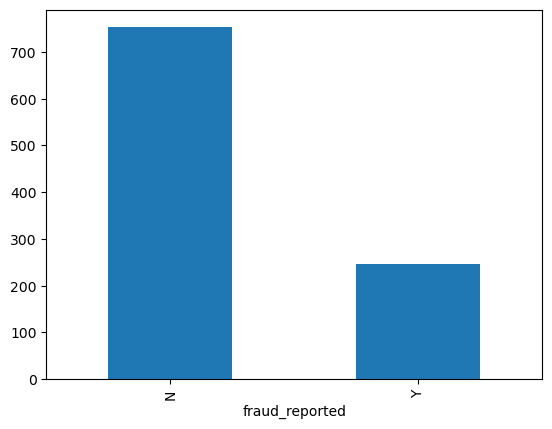

In [5]:
#Fraud Reported Stats
df_count_fraud = data.groupby(['fraud_reported']).count()
df_fraud = df_count_fraud['policy_number']
df_fraud.plot.bar(x='Fraud Reported', y='Count')

C:\Users\Harsh\AppData\Local\Temp\ipykernel_2360\4101713674.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg_prem = data.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']


<Axes: xlabel='insured_education_level'>

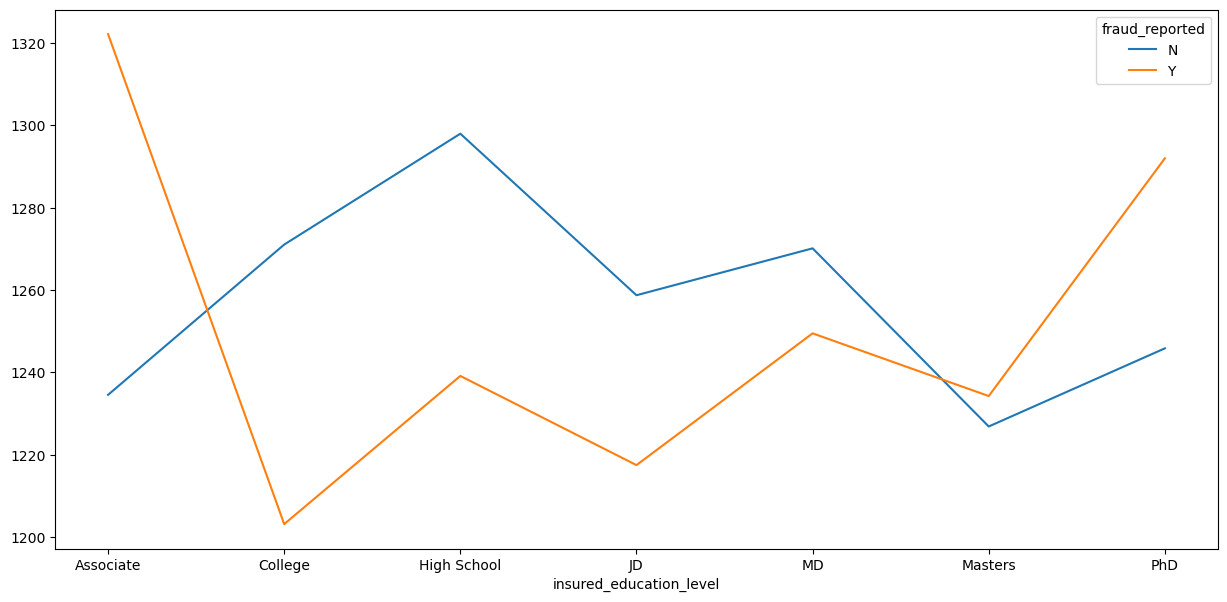

In [6]:
#Annual premium of education level policy_annual_premium
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,7))
df_avg_prem = data.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']
df_avg_prem.unstack().plot(ax=ax)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_2360\3736286364.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)


<Axes: xlabel='insured_occupation'>

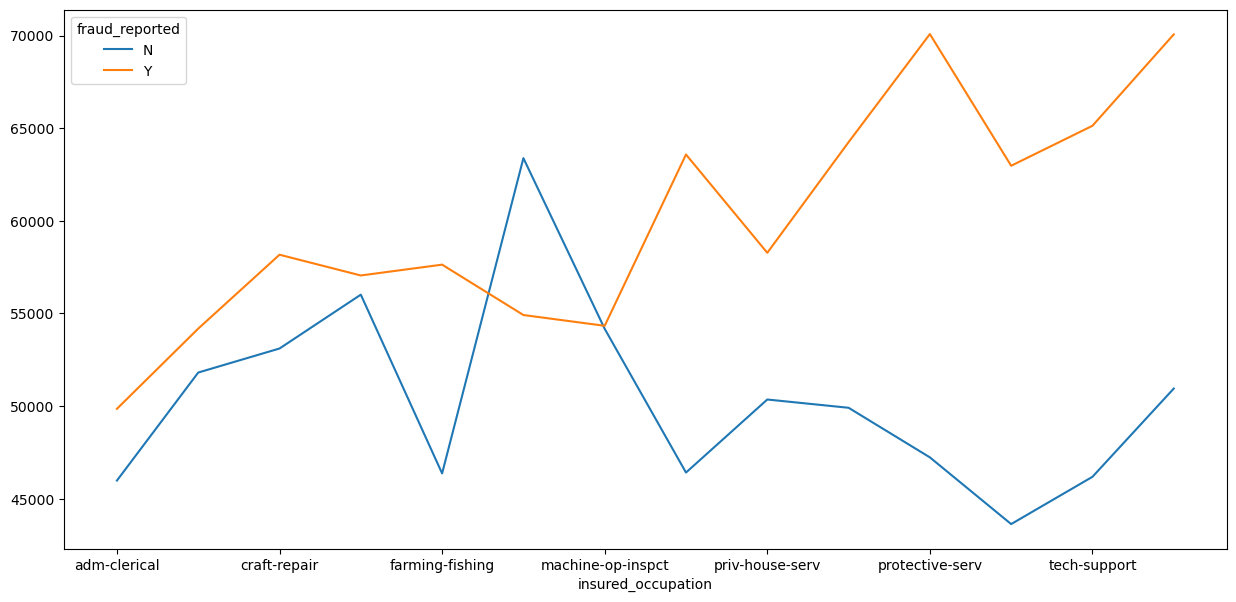

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_2360\4127920380.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


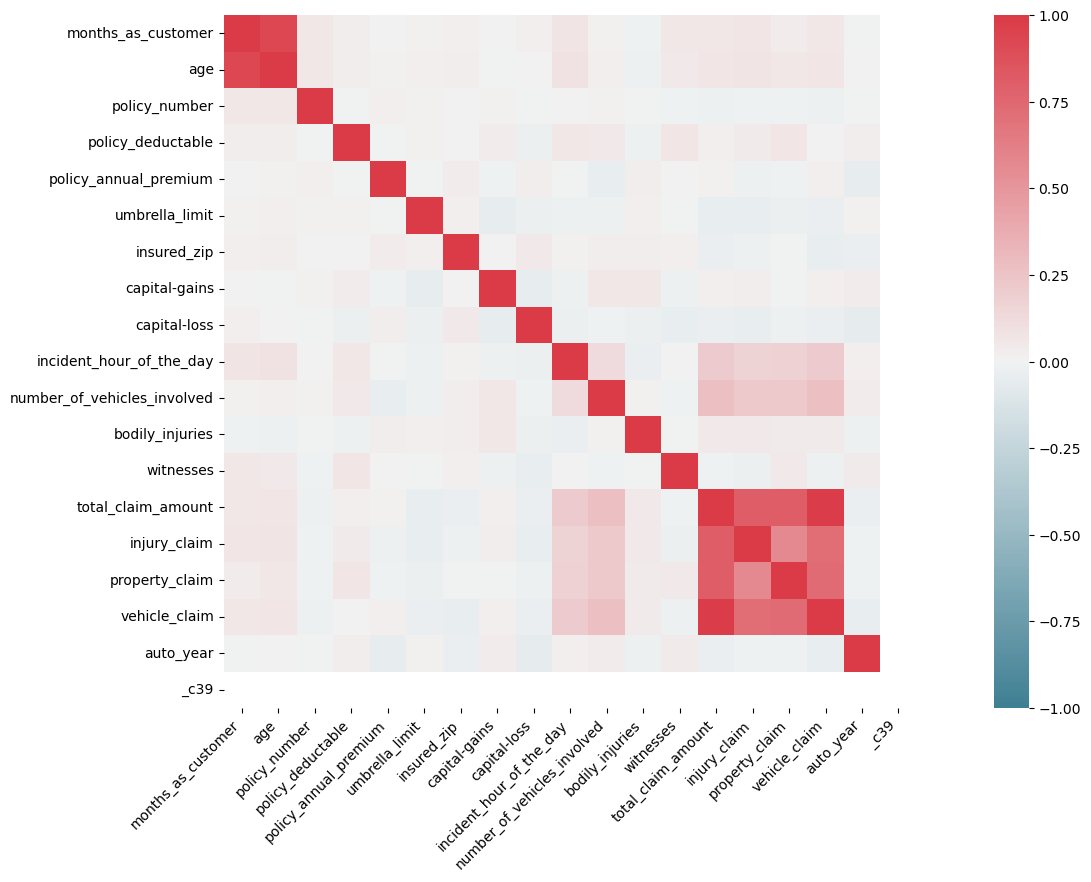

In [8]:
import numpy as np 
import seaborn as sns

plt.figure(figsize=(20, 9))

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
#Remove Less Correlated Columns
deleteCols = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date", "_c39"]
data = data.drop(deleteCols, axis=1)
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [10]:
#Handle Categorical Data
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [11]:
#One-hot encoding all categorical columns except output column(i.e. fraud_reported)
list_hot_encoded = []
for column in data.columns:
    if(data[column].dtypes==object and column != 'fraud_reported'):
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)
#Drop hot-encoded columns
data = data.drop(list_hot_encoded, axis=1)

#Binary encoder for output column
data['fraud_reported'] = data['fraud_reported'].map( {'Y':1, 'N':0})

data 

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,0,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,0,0,0,0,0,0,0,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Model Training
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

y = data['fraud_reported']
X = data.drop(['fraud_reported'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [15]:
from sklearn import neighbors

#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance')
KNNClassifier.fit(X=X_train,y=y_train)
KNNClassifier.score(X_test,y_test)

KNN Score :


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
KNN_y_predicted = KNNClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, X, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

NameError: name 'KNN_y_predicted' is not defined

In [17]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from sklearn import tree

#DecisionTree
DTClassifier = tree.DecisionTreeClassifier()
DTClassifier.fit(X_train, y_train) 

print("Decision Tree Score :")
DTClassifier.score(X_test,y_test)

In [ ]:
DT_y_predicted = DTClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, DT_y_predicted)

In [ ]:
print(classification_report(y_test, DT_y_predicted))

scores = cross_val_score(DTClassifier, X, y, cv=10, scoring='accuracy')
dt_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % dt_accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
dt_pred_prob = DTClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Decision Tree (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Decision Tree CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.svm import SVC

#Support Vector Machine
SVMClassifier = SVC(kernel='rbf',probability=True,random_state=42, gamma='auto') 
SVMClassifier.fit(X_train, y_train) 
print("SVM Score :")
SVMClassifier.score(X_test,y_test)

In [ ]:
SVM_y_predicted = SVMClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, SVM_y_predicted)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, SVM_y_predicted)
print(report)

scores = cross_val_score(SVMClassifier, X, y, cv=10, scoring='accuracy')
svm_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % svm_accuracy)

In [ ]:
svm_pred_prob = SVMClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Random Forest
RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train, y_train) 
print("Random Forest Score :")
RFClassifier.score(X_test,y_test)

In [ ]:
RF_y_predicted = RFClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, RF_y_predicted)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, RF_y_predicted)
print(report)

scores = cross_val_score(RFClassifier, X, y, cv=10, scoring='accuracy')
rf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % rf_accuracy)

In [ ]:
from sklearn.metrics import roc_curve, auc
rf_pred_prob = RFClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve  Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for  random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
#Balanced Random Forest
BRFClassifier=BalancedRandomForestClassifier()
BRFClassifier.fit(X_train, y_train) 
print("Balanced Random Forest Score :")
BRFClassifier.score(X_test,y_test)

In [ ]:
BRF_y_predicted = BRFClassifier.predict(X_test)
report = classification_report(y_test, BRF_y_predicted)
print(report)

scores = cross_val_score(BRFClassifier, X, y, cv=10, scoring='accuracy')
brf_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % brf_accuracy)

In [ ]:
brf_pred_prob = BRFClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, brf_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve Balanced Random Forest (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for Balanced random forest CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
#LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train) 
print("Linear Discriminant Analysis Score :")
lda.score(X_test,y_test)

In [ ]:
lda_y_predicted = lda.predict(X_test)
report = classification_report(y_test, lda_y_predicted)
print(report)

scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
lda_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % lda_accuracy)

In [ ]:
lda_pred_prob = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
#Naive Bayes Classifier
NBClassifier = BernoulliNB()
NBClassifier.fit(X_train, y_train)
print("Naive Bayes Classifier Score :")
NBClassifier.score(X_test,y_test)

In [ ]:
nb_y_predicted = NBClassifier.predict(X_test)
report = classification_report(y_test, nb_y_predicted)

print(report)

scores = cross_val_score(NBClassifier, X, y, cv=10, scoring='accuracy')
nb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % nb_accuracy)

In [ ]:
from xgboost import XGBClassifier
#XGBOOST Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train, verbose=False) 
print("XGBClassifier Score :")
model_xgb.score(X_test,y_test)

In [ ]:
xgboost_y_predicted = model_xgb.predict(X_test)
report = classification_report(y_test, xgboost_y_predicted)

print(report)

scores = cross_val_score(model_xgb, X, y, cv=10, scoring='accuracy')
xgb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % xgb_accuracy)

In [ ]:
xgb_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve XGBOOST (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for XGBOOST CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
#Newral Network Classifier
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))
clf_MLP.fit(X_train, y_train) 
print("MLPClassifier Score :")
clf_MLP.score(X_test,y_test)

In [ ]:
mlp_y_predicted = clf_MLP.predict(X_test)
report = classification_report(y_test, mlp_y_predicted)

print(report)

scores = cross_val_score(clf_MLP, X, y, cv=10, scoring='accuracy')
mlp_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % mlp_accuracy)

In [ ]:
#Comparing the models
fpr9, tpr9, thresholds9 = roc_curve(y_test, nb_y_predicted)
roc_auc9 = auc(fpr9, tpr9)

fpr8, tpr8, thresholds8 = roc_curve(y_test, mlp_y_predicted)
roc_auc8 = auc(fpr8, tpr8)

fpr7, tpr7, thresholds7 = roc_curve(y_test, DT_y_predicted)
roc_auc7 = auc(fpr7, tpr7)

fpr6, tpr6, thresholds6 = roc_curve(y_test, lda_pred_prob)
roc_auc6 = auc(fpr6, tpr6)

fpr5, tpr5, thresholds5 = roc_curve(y_test, knn_pred_prob)
roc_auc5 = auc(fpr5, tpr5)

fpr4, tpr4, thresholds4 = roc_curve(y_test, rf_pred_prob)
roc_auc4 = auc(fpr4, tpr4)

fpr3, tpr3, thresholds3 = roc_curve(y_test, xgb_pred_prob)
roc_auc3 = auc(fpr3, tpr3)

fpr2, tpr2, thresholds2 = roc_curve(y_test, brf_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

fpr1, tpr1, thresholds1 = roc_curve(y_test,svm_pred_prob)
roc_auc1 = auc(fpr1, tpr1)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr9, tpr9,color='brown',label='ROC NB (AUC = %0.2f, ACC = %0.2f)' % (roc_auc9, nb_accuracy))
plt.plot(fpr8, tpr8,color='yellow',label='ROC MLP (AUC = %0.2f, ACC = %0.2f)' % (roc_auc8, mlp_accuracy))
plt.plot(fpr7, tpr7,color='cyan',label='ROC Decision Tree (AUC = %0.2f, ACC = %0.2f)' % (roc_auc7, dt_accuracy))
plt.plot(fpr6, tpr6,color='orange',label='ROC LDA (AUC = %0.2f, ACC = %0.2f)' % (roc_auc6, lda_accuracy))
plt.plot(fpr5, tpr5,color='green',label='ROC KNN (AUC = %0.2f, ACC = %0.2f)' % (roc_auc5, knn_accuracy))
plt.plot(fpr4, tpr4,color='red',label='ROC RF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc4, rf_accuracy))
plt.plot(fpr3, tpr3,color='blue',label='ROC XGBOOST (AUC = %0.2f, ACC = %0.2f)' % (roc_auc3, xgb_accuracy))
plt.plot(fpr2, tpr2,color='black',label='ROC BRF (AUC = %0.2f, ACC = %0.2f)' % (roc_auc2, brf_accuracy))
plt.plot(fpr1, tpr1,color='magenta',label='ROC SVM (AUC = %0.2f, ACC = %0.2f)' % (roc_auc1, svm_accuracy))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

print("The predictive power of each model expressed by ROC curves. For instance, Linear Discriminant Analysis and XGBOOST model has\
        higher probability of accurate prediction of correct class member, and gaining high level of accuracy prediction probability\
        as compared to Random Forest, KNN, Naive Bayes, Neural Network and SVM models.")

In [ ]:
#XGBOOST model has better ROC Curve and Cross-validated accuracy, plot feature importance
def rf_feat_importance(m, df):
    return pd.DataFrame({'feature':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi): 
    return fi.plot('feature', 'imp', 'barh', figsize=(15,7), legend=False)

fi = rf_feat_importance(model_xgb, X_train); fi[:15]

In [ ]:
plot_fi(fi[:30])

In [ ]:
#As XGBOOST has the best results with an AUC of 0.82, using this model for scoring
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target = test_target.replace({1:'Y', 0:'N'})

predicted_target = model_xgb.predict(X_test)
predicted_target = pd.Series(predicted_target).replace({1:'Y', 0:'N'})

In [ ]:
ranks=pd.DataFrame(data=
                   { 
                       'RealClass':test_target, 
                       'PredictedClass':predicted_target,
                       'rank':xgb_pred_prob
                   })
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

In [ ]:
top = ranks.where(ranks['rank']>0.5,).dropna()
top.head()